# Deep Learning - 1

## Chapter 2: Multiple inputs Neural Network

### Training muilptiple inputs Neural Network

---------------

### Import

In [1]:
import numpy as np

### Data

<img src="images/Data.PNG" alt="Drawing" width="400"/>

In [27]:
training_dataset = np.array([[30, 2],  
                             [25, 1],
                             [27, 3]])
training_label = np.array([1, 2, 1])
training_dataset.shape

(3, 2)

### Data Pre-processing

#### StandardScaler

In [28]:
def standard_normalize(training_dataset, means, stdevs):
    """Normalizing each value by using zsocre method"""
    for row in training_dataset:
        for i in range(len(row)):
            row[i] = (row[i] - means[i]) / stdevs[i]

In [29]:
means = np.mean(training_dataset, axis=0)
stds = np.std(training_dataset, axis=0)

standard_normalize(training_dataset, means, stds)
training_dataset

array([[ 1,  0],
       [-1, -1],
       [ 0,  1]])

In [16]:
def minmax_normalize(training_dataset, minmax):
    """ Normalizing each value by using minmax method"""
    for row in training_dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) \
            / (minmax[i][1] - minmax[i][0])

In [18]:
minmax = np.array([training_dataset.min(axis=0), 
                   training_dataset.max(axis=0)]).T
minmax_normalize(training_dataset, minmax)
training_dataset

array([[1, 0],
       [0, 0],
       [0, 1]])

### Model

<img src="images/Model.PNG" alt="Drawing" width="400"/>

In [19]:
def neural_network(input: 'matrix', weigth: 'vector', bias: float) -> 'vector':
    """
    Multiple inputs neural network
    It multiplies the inputs by the weights and then sums them and bias.
    """
    output = input.dot(weigth) + bias
    return output

### Parameters

In [20]:
weights = np.random.rand(2)
bias = 0
print(f'weight: {weights} bias: {bias}')

weight: [0.96651524 0.61011755] bias: 0


### Hyperparameters

In [21]:
epoch = 300
alpha = 0.1
batch_size = 3

### Optimizing the parameters

In [32]:
for iteration in range(epoch):
    error = 0
    for i in range(int(len(training_dataset) / batch_size)):
        batch_start = i * batch_size
        batch_end = (i+1) * batch_size
        
        input = training_dataset[batch_start:batch_end]
        true = training_label[batch_start:batch_end]

        prediction = neural_network(input, weights, bias)
        
        #MSE
        error += np.sum((prediction - true) ** 2 / len(training_dataset))
        
        #Gradient descent
        # w_new = w_old - 2 * alpha * (pred - true) * input 
        # b_new = b_old - 2 * alpha * (pred - true)
        delta = (prediction - true) / batch_size #Direction
        weights_delta = delta.dot(input) * alpha  #Weight Amount
        bias_delta = np.sum(delta) * alpha #Bias Amount
        
        weights -= weights_delta
        bias -= bias_delta
        
        print(f'Таамаг: {prediction}\nҮнэн утга: {true}',
              f'\nWeight: {weights} \nWeight өөрчлөлт: {weights_delta}',
              f'\nBias: {bias} \nBias өөрчлөлт: {bias_delta}')
    print(f'Давталт: {iteration} \tНийт алдаа: {error}\n')
print(f'\nWeight: {weights} and Bias: {bias}')

Таамаг: [1.03610605 3.63192679 1.0360924 ]
Үнэн утга: [1 2 1] 
Weight: [-0.81207501 -0.8120882 ] 
Weight өөрчлөлт: [-0.05319402 -0.05319448] 
Bias: 1.8445709063863038 
Bias өөрчлөлт: 0.0568041747836634
Давталт: 0 	Нийт алдаа: 0.8885971209497011

Таамаг: [1.0324959  3.46873411 1.03248271]
Үнэн утга: [1 2 1] 
Weight: [-0.7642004  -0.76421315] 
Weight өөрчлөлт: [-0.04787461 -0.04787505] 
Bias: 1.7934471490810067 
Bias өөрчлөлт: 0.05112375730529706
Давталт: 1 	Нийт алдаа: 0.7197636679731191

Таамаг: [1.02924675 3.3218607  1.029234  ]
Үнэн утга: [1 2 1] 
Weight: [-0.72111327 -0.72112559] 
Weight өөрчлөлт: [-0.04308713 -0.04308756] 
Bias: 1.7474357675062393 
Bias өөрчлөлт: 0.04601138157476733
Давталт: 2 	Нийт алдаа: 0.5830085710618346

Таамаг: [1.0263225  3.18967463 1.02631017]
Үнэн утга: [1 2 1] 
Weight: [-0.68233486 -0.68234678] 
Weight өөрчлөлт: [-0.0387784  -0.03877882] 
Bias: 1.7060255240889488 
Bias өөрчлөлт: 0.04141024341729059
Давталт: 3 	Нийт алдаа: 0.47223694256345766

Таамаг: [1.0

In [23]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


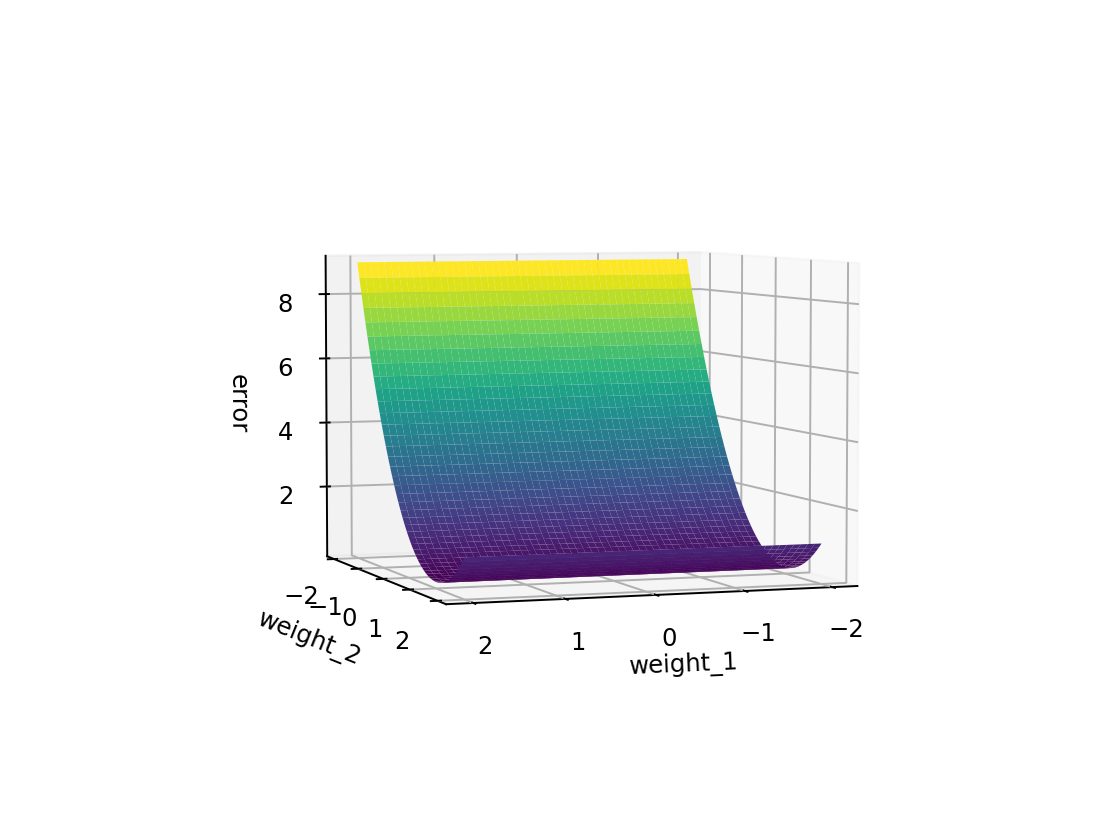

Text(0.5, 0, 'error')

In [33]:
day = 2
x = np.linspace(-2,2,1000)

X, Y = np.meshgrid(x, x)

#error = (input_1 * weight_1 + input_2 * weight_2 - true) ** 2
Z = (training_dataset[day][0] * X 
     + training_dataset[day][1] * Y - training_label[day]) ** 2
# y = neural_network(x, weight, bias)

fig1 = plt.figure()
ax =  fig1.add_subplot(projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('weight_1')
ax.set_ylabel('weight_2')
ax.set_zlabel('error')

### Usage

In [15]:
test_dataset = np.array([[20., 5.],
                         [18., 4.]])
minmax_normalize(test_dataset, minmax)
test_prediction = neural_network(test_dataset, weights, bias)
print(f'Таамаг: {test_prediction}')

Таамаг: [1.13976228 1.75091423]
